# How to predict relation before a text ? Part 2 : Data modelisation

## 1. Library import and function construction

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import joblib

import pandas as pd
from sklearn.preprocessing import StandardScaler

from google.colab import drive


## 2. Data import

In [16]:
url = "https://drive.google.com/uc?id=1F12R1pIHRvhvx_mP4W1btqKkrgmq6ULu"
df_bag_of_word = pd.read_csv(url)
df_bag_of_word = df_bag_of_word.dropna()
df_bag_of_word

,of,my,me,be,now,user,i,is,are,just,...,that,can,we,love,your,it,have,dont,was,irony
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,2,0,3,1,0,0
2858,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2859,0,0,0,0,0,1,4,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2860,0,0,0,0,0,1,1,1,0,0,...,0,0,0,2,1,1,0,1,0,0


In [17]:
url = "https://drive.google.com/uc?export=download&id=1Pchfvh_kq1R8alWcfBIsS4qp1WrtW4hG"
df_word_embedding = pd.read_csv(url)
df_word_embedding = df_word_embedding.dropna()
df_word_embedding

,irony,Average_Word_Embedding_1,Average_Word_Embedding_2,Average_Word_Embedding_3,Average_Word_Embedding_4,Average_Word_Embedding_5,Average_Word_Embedding_6,Average_Word_Embedding_7,Average_Word_Embedding_8,Average_Word_Embedding_9,...,Average_Word_Embedding_291,Average_Word_Embedding_292,Average_Word_Embedding_293,Average_Word_Embedding_294,Average_Word_Embedding_295,Average_Word_Embedding_296,Average_Word_Embedding_297,Average_Word_Embedding_298,Average_Word_Embedding_299,Average_Word_Embedding_300
0,1,-0.623894,0.792558,-2.186175,-0.372055,2.715074,0.218922,0.548478,3.763309,-0.529591,...,1.121402,0.624327,0.812582,-1.058928,-0.564151,-0.710050,0.093346,-1.236202,-4.309378,-0.517057
1,0,-0.745687,2.073689,-2.795128,-1.255372,2.411135,1.052030,-0.599766,5.016446,-0.816626,...,0.515603,-1.008624,-0.157885,-0.292001,-0.921117,0.270116,-0.168507,0.775776,-4.838754,1.145793
2,1,-0.550137,0.240913,-1.754669,-2.128440,-3.764561,0.792897,1.153168,2.426471,-3.721498,...,2.808935,-0.556405,1.522479,-0.036224,-2.134692,-0.780140,1.800978,1.845947,-3.692695,0.440292
3,1,-0.644534,1.882416,-1.395405,-0.486086,1.039252,0.019061,0.300466,2.025311,0.285460,...,1.377846,-0.687466,1.781516,-0.768728,-0.686885,0.679941,1.123513,0.080642,-1.661254,1.377343
4,1,-0.392542,0.603784,-0.356930,0.773068,1.398230,0.680707,1.234802,1.486290,-1.161698,...,-0.129554,-0.950335,1.390735,-0.076897,-0.726016,0.682689,0.373667,-0.909967,-2.141481,0.254790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,0,-0.415973,4.913784,-5.135102,-1.871229,-0.424539,1.782564,1.246084,3.612165,-4.101847,...,1.309386,-0.210777,-0.662552,-1.214972,-0.578932,-1.365409,-0.097708,0.674817,-5.745248,3.062205
2858,1,0.137787,-0.165283,-3.168906,1.315582,1.798445,-0.571614,0.245352,3.073169,-0.704461,...,1.287688,0.489932,-1.236288,0.234981,-2.990087,0.409326,1.342555,0.031471,-0.852824,1.613507
2859,0,0.021936,0.283038,-2.721251,-2.744000,-2.127574,-0.491878,-0.126956,3.684839,-4.155490,...,2.795556,-0.220150,4.444219,-2.590191,-2.155998,2.093228,2.217274,0.187461,-5.151009,0.374190
2860,0,1.526422,1.699203,-2.998710,-2.574385,-1.887390,0.555843,1.684765,2.693125,-2.625650,...,2.356533,0.582310,1.587730,-2.323588,-1.375875,-0.976204,2.614103,1.164941,-3.996766,2.418257


In [18]:
url = "https://drive.google.com/uc?id=1FZgmWBRGlI_n6sxPFGPACaK4pTVKrnSN"
df_sentence_embedding = pd.read_csv(url)
df_sentence_embedding = df_sentence_embedding.dropna()
df_sentence_embedding

,Sentence_Embedding_1,Sentence_Embedding_2,Sentence_Embedding_3,Sentence_Embedding_4,Sentence_Embedding_5,Sentence_Embedding_6,Sentence_Embedding_7,Sentence_Embedding_8,Sentence_Embedding_9,Sentence_Embedding_10,...,Sentence_Embedding_760,Sentence_Embedding_761,Sentence_Embedding_762,Sentence_Embedding_763,Sentence_Embedding_764,Sentence_Embedding_765,Sentence_Embedding_766,Sentence_Embedding_767,Sentence_Embedding_768,irony
0,0.037271,0.288889,0.382283,-0.006436,-0.418397,-0.603479,0.443474,0.633591,-0.178565,-0.661667,...,-0.073888,0.377625,-0.130956,0.424157,-0.026347,-0.017935,-0.366581,0.345595,0.124437,1
1,-0.239384,0.115341,-0.056706,-0.400722,-0.328102,-0.043605,0.305259,0.479864,-0.070552,-0.475837,...,-0.401149,-0.000700,0.228261,-0.223528,0.565738,-0.348445,0.080054,0.025412,0.596070,0
2,0.143000,0.142331,0.122259,-0.078430,-0.067211,-0.247911,0.250157,0.437332,-0.227183,-0.372910,...,-0.433088,-0.205428,0.007005,0.345982,-0.182748,-0.122095,-0.134963,0.170838,0.280598,1
3,0.291536,-0.003828,-0.087659,-0.000985,-0.247611,-0.116834,0.391652,0.179078,-0.028538,-0.361505,...,0.103418,0.118967,-0.202276,-0.199983,-0.122162,-0.054098,-0.325675,0.460774,0.446290,1
4,-0.045775,-0.062084,0.038487,0.225337,-0.401410,-0.564525,0.561134,0.719394,-0.034191,-0.372070,...,-0.058138,-0.078144,-0.199974,0.474694,-0.164658,-0.563821,-0.432837,0.313833,0.658722,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,0.240482,0.407762,-0.216748,-0.306831,-0.660285,-0.570560,0.823977,0.821655,0.130606,-0.176757,...,0.271232,0.037490,-0.303465,0.305116,-0.015278,0.243161,-0.609509,0.468792,0.921516,0
2858,0.169674,0.410665,-0.131282,-0.035778,-0.483309,-0.240251,0.614343,0.504015,0.005528,-0.061173,...,-0.372678,-0.056112,-0.252996,0.319624,0.017259,-0.306690,-0.599260,0.071827,0.358606,1
2859,0.034766,0.263894,0.113522,-0.321205,-0.229827,-0.644035,0.614931,0.753473,0.141837,-0.376109,...,-0.303587,0.098658,-0.212647,0.201183,-0.133057,-0.357476,-0.164758,0.416585,0.440004,0
2860,-0.132813,-0.191460,0.047862,-0.253624,-0.424554,-0.257613,0.912245,0.603519,0.325182,-0.422412,...,-0.087218,0.018100,-0.281283,0.284841,0.050058,-0.144155,-0.745114,0.139031,0.501744,0


## 3. data standardisation

### 3.1 df_bag_of_word standardization


In [19]:
# Separate the target variable
y1 = df_bag_of_word['irony']
bag_of_word = df_bag_of_word.drop(columns=['irony'])

# Standardize the features
scaler = StandardScaler()
X1 = scaler.fit_transform(bag_of_word)
X1 = pd.DataFrame(X1, columns=bag_of_word.columns)

# Merge the data
df_bag_of_word = X1.copy()
df_bag_of_word['irony'] = y1

display(df_bag_of_word)

,of,my,me,be,now,user,i,is,are,just,...,that,can,we,love,your,it,have,dont,was,irony
0,2.081432,2.105957,3.502198,-0.266248,-0.188336,-0.604599,-0.480437,-0.420652,-0.239348,-0.255352,...,-0.318504,-0.203015,-0.187905,-0.239595,-0.20704,-0.309295,-0.246353,-0.185873,-0.210531,1
1,-0.375087,-0.367268,-0.249034,3.345130,-0.188336,-0.604599,-0.480437,-0.420652,-0.239348,-0.255352,...,-0.318504,-0.203015,-0.187905,-0.239595,-0.20704,-0.309295,-0.246353,-0.185873,-0.210531,0
2,-0.375087,-0.367268,-0.249034,-0.266248,5.201848,0.397348,3.133256,-0.420652,-0.239348,-0.255352,...,-0.318504,-0.203015,-0.187905,-0.239595,-0.20704,-0.309295,-0.246353,-0.185873,-0.210531,1
3,-0.375087,-0.367268,-0.249034,-0.266248,-0.188336,1.399295,-0.480437,1.921577,-0.239348,-0.255352,...,-0.318504,-0.203015,-0.187905,-0.239595,-0.20704,-0.309295,-0.246353,-0.185873,-0.210531,1
4,-0.375087,-0.367268,-0.249034,-0.266248,-0.188336,-0.604599,-0.480437,-0.420652,3.720265,3.782315,...,-0.318504,-0.203015,-0.187905,-0.239595,-0.20704,-0.309295,-0.246353,-0.185873,-0.210531,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,-0.375087,-0.367268,-0.249034,-0.266248,-0.188336,-0.604599,1.326410,-0.420652,-0.239348,-0.255352,...,-0.318504,-0.203015,-0.187905,-0.239595,8.19792,-0.309295,11.187093,4.978871,-0.210531,0
2858,-0.375087,-0.367268,3.502198,-0.266248,-0.188336,0.397348,-0.480437,-0.420652,-0.239348,-0.255352,...,-0.318504,-0.203015,-0.187905,-0.239595,-0.20704,-0.309295,-0.246353,-0.185873,-0.210531,1
2859,-0.375087,-0.367268,-0.249034,-0.266248,-0.188336,0.397348,6.746950,-0.420652,-0.239348,-0.255352,...,2.699905,-0.203015,-0.187905,-0.239595,-0.20704,-0.309295,-0.246353,-0.185873,-0.210531,0
2860,-0.375087,-0.367268,-0.249034,-0.266248,-0.188336,0.397348,1.326410,1.921577,-0.239348,-0.255352,...,-0.318504,-0.203015,-0.187905,7.827723,3.99544,2.671184,-0.246353,4.978871,-0.210531,0


### 3.2 df_word_embedding standardization

In [20]:
# Separate the target variable
y2 = df_word_embedding['irony']
word_embedding = df_word_embedding.drop(columns=['irony'])

# Standardize the features
scaler = StandardScaler()
X2 = scaler.fit_transform(word_embedding)
X2 = pd.DataFrame(X2, columns=word_embedding.columns)

# Merge the data
df_word_embedding = X2.copy()
df_word_embedding['irony'] = y2
display(df_word_embedding)

,Average_Word_Embedding_1,Average_Word_Embedding_2,Average_Word_Embedding_3,Average_Word_Embedding_4,Average_Word_Embedding_5,Average_Word_Embedding_6,Average_Word_Embedding_7,Average_Word_Embedding_8,Average_Word_Embedding_9,Average_Word_Embedding_10,...,Average_Word_Embedding_292,Average_Word_Embedding_293,Average_Word_Embedding_294,Average_Word_Embedding_295,Average_Word_Embedding_296,Average_Word_Embedding_297,Average_Word_Embedding_298,Average_Word_Embedding_299,Average_Word_Embedding_300,irony
0,-0.329894,-0.162157,-0.105948,0.260010,0.581308,-0.234705,-0.217928,0.866232,0.589977,-0.308792,...,0.877136,-0.008981,-0.370434,0.345081,-0.889213,-0.627120,-0.971601,-1.241044,-1.484582,1
1,-0.423093,0.694665,-0.515836,-0.487359,0.423560,0.581229,-1.390314,1.696908,0.377877,0.135074,...,-0.823160,-0.827475,0.257475,-0.010710,0.038862,-0.883480,0.461164,-1.609599,0.008012,0
2,-0.273453,-0.531097,0.184500,-1.226057,-2.781701,0.327438,0.399476,-0.019928,-1.768634,2.674633,...,-0.352291,0.589747,0.466888,-1.220293,-0.955578,1.044690,1.223251,-0.811705,-0.625253,1
3,-0.345688,0.566741,0.426322,0.163528,-0.288464,-0.430447,-0.471154,-0.285848,1.192246,-0.740620,...,-0.488757,0.808219,-0.132837,0.222751,0.426906,0.381437,-0.033854,0.602597,0.215854,1
4,-0.152857,-0.288409,1.125321,1.228891,-0.102150,0.217560,0.482826,-0.643153,0.122891,0.505663,...,-0.762467,0.478634,0.433587,0.183749,0.429508,-0.352679,-0.739283,0.268260,-0.791763,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,-0.170787,2.594123,-2.090878,-1.008432,-1.048189,1.296706,0.494345,0.766042,-2.049686,0.918135,...,0.007592,-1.253111,-0.498192,0.330349,-1.509743,-0.814166,0.389269,-2.240707,1.728206,0
2858,0.252966,-0.802762,-0.767426,1.687909,0.105567,-1.008946,-0.527428,0.408754,0.460759,0.582636,...,0.737199,-1.737001,0.688933,-2.072874,0.170673,0.595883,-0.068869,1.165431,0.427838,1
2859,0.164314,-0.502924,-0.466109,-1.746879,-1.932085,-0.930854,-0.907563,0.814216,-2.089325,0.635664,...,-0.002168,3.053947,-1.624129,-1.241529,1.765084,1.452252,0.042214,-1.826993,-0.684587,0
2860,1.315589,0.444208,-0.652867,-1.603368,-1.807426,0.095271,0.942250,0.156831,-0.958873,1.564484,...,0.833387,0.644780,-1.405852,-0.463973,-1.141223,1.840757,0.738294,-1.023402,1.150191,0


### 3.3 df_sentence_embedding standardization

In [21]:
# Separate the target variable
y3 = df_sentence_embedding['irony']
sentence_embedding = df_sentence_embedding.drop(columns=['irony'])

# Standardize the features
scaler = StandardScaler()
X3 = scaler.fit_transform(sentence_embedding)
X3 = pd.DataFrame(X3, columns=sentence_embedding.columns)

# Merge the data
df_sentence_embedding = X3.copy()
df_sentence_embedding['irony'] = y3

## 4. Modeling

### 4.1 Logistic regression

#### 4.1.1 bag of word

In [22]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1000)

In [23]:
# Performing Logistic Regression
reg = LogisticRegression()
reg.fit(X1_train, y1_train)

LogisticRegression()

In [24]:
# Predict on the training data
y_train_pred = reg.predict(X1_train)

# Predict on the test data
y_test_pred = reg.predict(X1_test)

In [25]:

# Calculate accuracies
train_accuracy = accuracy_score(y1_train, y_train_pred)
test_accuracy = accuracy_score(y1_test, y_test_pred)

# Calculate bias-variance difference
accuracy_difference = train_accuracy - test_accuracy

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Accuracy Difference (Bias-Variance Diagnostic): {accuracy_difference:.2f}")

# Diagnostic Interpretation
if accuracy_difference > 0.1:
    print("The model might suffer from high variance (overfitting).")
elif train_accuracy < 0.8:
    print("The model might suffer from high bias (underfitting).")
else:
    print("The model has a good balance between bias and variance.")

Training Accuracy: 0.58
Test Accuracy: 0.58
Accuracy Difference (Bias-Variance Diagnostic): -0.00
The model might suffer from high bias (underfitting).


#### 4.1.2 Word embedding

In [26]:
# Perform train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1000)

In [27]:
# Performing Logistic Regression
reg = LogisticRegression()
reg.fit(X2_train, y2_train)

coef = pd.Series(reg.coef_[0], index=X2.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Predict on the training data
y_train_pred = reg.predict(X2_train)

# Predict on the test data
y_test_pred = reg.predict(X2_test)

In [29]:
# Conflusion matrix
cm = confusion_matrix(y2_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=['txtRelAvant true', 'txtRelAvant false'], columns = ['Predicted txtRelAvant true', 'Predicted txtRelAvant false'])
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
                   Predicted txtRelAvant true  Predicted txtRelAvant false
txtRelAvant true                          183                          124
txtRelAvant false                          98                          168


In [30]:

# Calculate accuracies
train_accuracy = accuracy_score(y2_train, y_train_pred)
test_accuracy = accuracy_score(y2_test, y_test_pred)

# Calculate bias-variance difference
accuracy_difference = train_accuracy - test_accuracy

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Accuracy Difference (Bias-Variance Diagnostic): {accuracy_difference:.2f}")

# Diagnostic Interpretation
if accuracy_difference > 0.1:
    print("The model might suffer from high variance (overfitting).")
elif train_accuracy < 0.8:
    print("The model might suffer from high bias (underfitting).")
else:
    print("The model has a good balance between bias and variance.")

Training Accuracy: 0.71
Test Accuracy: 0.61
Accuracy Difference (Bias-Variance Diagnostic): 0.09
The model might suffer from high bias (underfitting).


#### 4.1.3 Sentence embedding

In [31]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=1000)

In [32]:
# Performing Logistic Regression
reg = LogisticRegression()
reg.fit(X3_train, y3_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# Predict on the training data
y_train_pred = reg.predict(X3_train)

# Predict on the test data
y_test_pred = reg.predict(X3_test)


In [34]:
# Conflusion matrix
cm = confusion_matrix(y3_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=['txtRelAvant true', 'txtRelAvant false'], columns = ['Predicted txtRelAvant true', 'Predicted txtRelAvant false'])
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
                   Predicted txtRelAvant true  Predicted txtRelAvant false
txtRelAvant true                          183                          124
txtRelAvant false                         109                          157


In [35]:
# Calculate accuracies
train_accuracy = accuracy_score(y3_train, y_train_pred)
test_accuracy = accuracy_score(y3_test, y_test_pred)

# Calculate bias-variance difference
accuracy_difference = train_accuracy - test_accuracy

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Accuracy Difference (Bias-Variance Diagnostic): {accuracy_difference:.2f}")

# Diagnostic Interpretation
if accuracy_difference > 0.1:
    print("The model might suffer from high variance (overfitting).")
elif train_accuracy < 0.8:
    print("The model might suffer from high bias (underfitting).")
else:
    print("The model has a good balance between bias and variance.")

Training Accuracy: 0.86
Test Accuracy: 0.59
Accuracy Difference (Bias-Variance Diagnostic): 0.27
The model might suffer from high variance (overfitting).


### 4.2 Small neurone network

#### 4.2.1 df_bag_of_word

In [36]:
# Simple Neural Network with one hidden layer (2 neurons)
clf_2_neurons = MLPClassifier(hidden_layer_sizes=(2,), activation = 'relu',
                              solver='adam', max_iter = 1000, alpha=0.1, tol = 1e-6, batch_size= 1000,
                              random_state = 1000, verbose = True
                              )

# Train the network
clf_2_neurons.fit(X1_train, y1_train)

# Predict on the training data
y_train_pred = clf_2_neurons.predict(X1_train)

# Predict on the test data
y_test_pred = clf_2_neurons.predict(X1_test)

Iteration 1, loss = 1.01530260
Iteration 2, loss = 1.00826307
Iteration 3, loss = 1.00188708
Iteration 4, loss = 0.99534619
Iteration 5, loss = 0.98890515
Iteration 6, loss = 0.98280370
Iteration 7, loss = 0.97653775
Iteration 8, loss = 0.97056573
Iteration 9, loss = 0.96464797
Iteration 10, loss = 0.95889021
Iteration 11, loss = 0.95323781
Iteration 12, loss = 0.94772370
Iteration 13, loss = 0.94234692
Iteration 14, loss = 0.93699159
Iteration 15, loss = 0.93171024
Iteration 16, loss = 0.92667187
Iteration 17, loss = 0.92166161
Iteration 18, loss = 0.91679393
Iteration 19, loss = 0.91192760
Iteration 20, loss = 0.90725991
Iteration 21, loss = 0.90251516
Iteration 22, loss = 0.89792311
Iteration 23, loss = 0.89336839
Iteration 24, loss = 0.88896218
Iteration 25, loss = 0.88458388
Iteration 26, loss = 0.88032380
Iteration 27, loss = 0.87615196
Iteration 28, loss = 0.87196291
Iteration 29, loss = 0.86801364
Iteration 30, loss = 0.86401767
Iteration 31, loss = 0.86022307
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


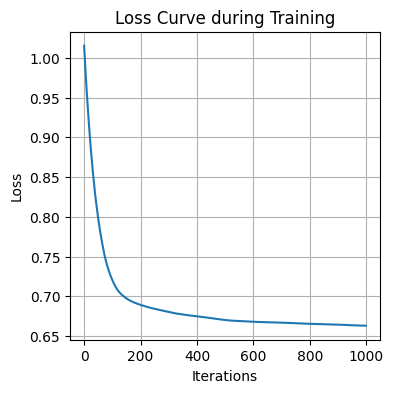

In [37]:
# Plot the loss curve
plt.figure(figsize = (4, 4))
plt.plot(clf_2_neurons.loss_curve_)
plt.title('Loss Curve during Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [38]:
# Conflusion matrix
cm = confusion_matrix(y1_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=['irony true', 'irony false'], columns=['Predicted irony true', 'Predicted irony false'])

# Display the confusion matrix
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
             Predicted anger true  Predicted anger false
anger true                    109                    198
anger false                    70                    196


In [39]:

# Calculate accuracies
train_accuracy = accuracy_score(y1_train, y_train_pred)
test_accuracy = accuracy_score(y1_test, y_test_pred)

# Calculate bias-variance difference
accuracy_difference = train_accuracy - test_accuracy

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Accuracy Difference (Bias-Variance Diagnostic): {accuracy_difference:.2f}")

# Diagnostic Interpretation
if accuracy_difference > 0.1:
    print("The model might suffer from high variance (overfitting).")
elif train_accuracy < 0.8:
    print("The model might suffer from high bias (underfitting).")
else:
    print("The model has a good balance between bias and variance.")

Training Accuracy: 0.60
Test Accuracy: 0.53
Accuracy Difference (Bias-Variance Diagnostic): 0.07
The model might suffer from high bias (underfitting).


#### 4.2.2 word embedding

In [40]:
# Simple Neural Network with one hidden layer (2 neurons)
clf_2_neurons = MLPClassifier(hidden_layer_sizes=(2,), activation = 'relu',
                              solver='adam', max_iter = 10000, alpha=0.1, tol = 1e-6, batch_size= 1000,
                              random_state = 1000, verbose = True
                              )

# Train the network
clf_2_neurons.fit(X2_train, y2_train)

# Predict on the training data
y_train_pred = clf_2_neurons.predict(X2_train)

# Predict on the test data
y_test_pred = clf_2_neurons.predict(X2_test)

Iteration 1, loss = 1.02496153
Iteration 2, loss = 0.98332460
Iteration 3, loss = 0.94899309
Iteration 4, loss = 0.92289200
Iteration 5, loss = 0.90178953
Iteration 6, loss = 0.88678801
Iteration 7, loss = 0.87475888
Iteration 8, loss = 0.86404428
Iteration 9, loss = 0.85328418
Iteration 10, loss = 0.84367191
Iteration 11, loss = 0.83512297
Iteration 12, loss = 0.82733696
Iteration 13, loss = 0.82063600
Iteration 14, loss = 0.81484780
Iteration 15, loss = 0.80953198
Iteration 16, loss = 0.80457328
Iteration 17, loss = 0.80000735
Iteration 18, loss = 0.79596215
Iteration 19, loss = 0.79218514
Iteration 20, loss = 0.78863122
Iteration 21, loss = 0.78523576
Iteration 22, loss = 0.78233378
Iteration 23, loss = 0.77932521
Iteration 24, loss = 0.77651051
Iteration 25, loss = 0.77382947
Iteration 26, loss = 0.77127357
Iteration 27, loss = 0.76865593
Iteration 28, loss = 0.76629985
Iteration 29, loss = 0.76379734
Iteration 30, loss = 0.76130859
Iteration 31, loss = 0.75896089
Iteration 32, los

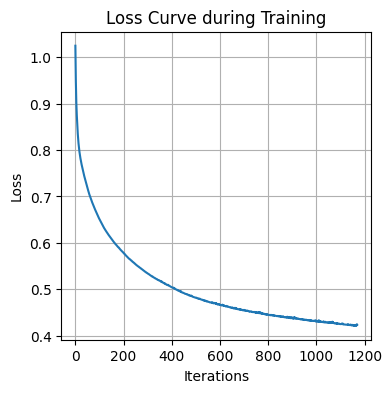

In [41]:
# Plot the loss curve
plt.figure(figsize = (4, 4))
plt.plot(clf_2_neurons.loss_curve_)
plt.title('Loss Curve during Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [42]:
# Conflusion matrix
cm = confusion_matrix(y2_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=['irony true', 'irony false'], columns=['Predicted irony true', 'Predicted irony false'])

# Display the confusion matrix
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
                   Predicted txtRelAvant true  Predicted txtRelAvant false
txtRelAvant true                          200                          107
txtRelAvant false                         115                          151


In [43]:

# Calculate accuracies
train_accuracy = accuracy_score(y2_train, y_train_pred)
test_accuracy = accuracy_score(y2_test, y_test_pred)

# Calculate bias-variance difference
accuracy_difference = train_accuracy - test_accuracy

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Accuracy Difference (Bias-Variance Diagnostic): {accuracy_difference:.2f}")

# Diagnostic Interpretation
if accuracy_difference > 0.1:
    print("The model might suffer from high variance (overfitting).")
elif train_accuracy < 0.8:
    print("The model might suffer from high bias (underfitting).")
else:
    print("The model has a good balance between bias and variance.")

Training Accuracy: 0.81
Test Accuracy: 0.61
Accuracy Difference (Bias-Variance Diagnostic): 0.19
The model might suffer from high variance (overfitting).


#### 4.2.3 sentence embedding

In [61]:
# Simple Neural Network with one hidden layer (2 neurons)
clf_2_neurons = MLPClassifier(hidden_layer_sizes=(2,), activation = 'relu',
                              solver='adam', max_iter = 10000, alpha=1.0, tol = 1e-6, batch_size= 1000,
                              random_state = 1000, verbose = True
                              )

# Train the network
clf_2_neurons.fit(X3_train, y3_train)

# Predict on the training data
y_train_pred = clf_2_neurons.predict(X3_train)

# Predict on the test data
y_test_pred = clf_2_neurons.predict(X3_test)

Iteration 1, loss = 0.81728146
Iteration 2, loss = 0.78094169
Iteration 3, loss = 0.75244280
Iteration 4, loss = 0.73240984
Iteration 5, loss = 0.71418763
Iteration 6, loss = 0.69966522
Iteration 7, loss = 0.68712619
Iteration 8, loss = 0.67639936
Iteration 9, loss = 0.66702330
Iteration 10, loss = 0.65777381
Iteration 11, loss = 0.64934816
Iteration 12, loss = 0.64112347
Iteration 13, loss = 0.63331945
Iteration 14, loss = 0.62647681
Iteration 15, loss = 0.62001222
Iteration 16, loss = 0.61418015
Iteration 17, loss = 0.60852344
Iteration 18, loss = 0.60334875
Iteration 19, loss = 0.59870283
Iteration 20, loss = 0.59396674
Iteration 21, loss = 0.58984088
Iteration 22, loss = 0.58579873
Iteration 23, loss = 0.58188667
Iteration 24, loss = 0.57794638
Iteration 25, loss = 0.57434173
Iteration 26, loss = 0.57088778
Iteration 27, loss = 0.56749808
Iteration 28, loss = 0.56427649
Iteration 29, loss = 0.56120937
Iteration 30, loss = 0.55806025
Iteration 31, loss = 0.55505689
Iteration 32, los

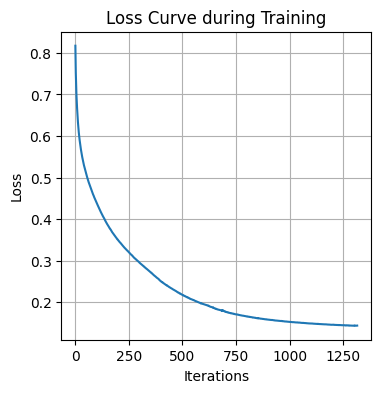

In [62]:
# Plot the loss curve
plt.figure(figsize = (4, 4))
plt.plot(clf_2_neurons.loss_curve_)
plt.title('Loss Curve during Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [63]:
# Conflusion matrix
cm = confusion_matrix(y3_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=['anger true', 'anger false'], columns=['Predicted anger true', 'Predicted anger false'])

# Display the confusion matrix
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
             Predicted anger true  Predicted anger false
anger true                    172                    135
anger false                    94                    172


In [64]:

# Calculate accuracies
train_accuracy = accuracy_score(y3_train, y_train_pred)
test_accuracy = accuracy_score(y3_test, y_test_pred)

# Calculate bias-variance difference
accuracy_difference = train_accuracy - test_accuracy

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Accuracy Difference (Bias-Variance Diagnostic): {accuracy_difference:.2f}")

# Diagnostic Interpretation
if accuracy_difference > 0.1:
    print("The model might suffer from high variance (overfitting).")
elif train_accuracy < 0.8:
    print("The model might suffer from high bias (underfitting).")
else:
    print("The model has a good balance between bias and variance.")

Training Accuracy: 0.98
Test Accuracy: 0.60
Accuracy Difference (Bias-Variance Diagnostic): 0.38
The model might suffer from high variance (overfitting).


### 4.3 Large neurone Network

#### 4.3.1 bag of word

In [211]:
# Large Neural Network
clf_50_neurons = MLPClassifier(hidden_layer_sizes=(50,),activation='tanh',
                               solver='adam',max_iter=500, alpha=1,tol=1e-4,
    batch_size=5000,
    random_state=1000,
    verbose=True
)

clf = MLPClassifier(
    hidden_layer_sizes=( 50, 25),  # Increased number of neurons and added a layer
    activation='relu',
    solver='adam',
    learning_rate_init=0.0005,
    max_iter=1000,
    alpha=0.01,
    tol=1e-4,
    batch_size=128,
    random_state=1000,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=True
)
# Train the network
clf.fit(X1_train, y1_train)

# Predict on the training data
y_train_pred = clf.predict(X1_train)

# Predict on the test data
y_test_pred = clf.predict(X1_test)

Iteration 1, loss = 0.72363540
Validation score: 0.475983
Iteration 2, loss = 0.70645362
Validation score: 0.493450
Iteration 3, loss = 0.69617550
Validation score: 0.545852
Iteration 4, loss = 0.68874033
Validation score: 0.567686
Iteration 5, loss = 0.68275034
Validation score: 0.567686
Iteration 6, loss = 0.67796703
Validation score: 0.580786
Iteration 7, loss = 0.67426862
Validation score: 0.580786
Iteration 8, loss = 0.67150541
Validation score: 0.576419
Iteration 9, loss = 0.66792738
Validation score: 0.606987
Iteration 10, loss = 0.66496965
Validation score: 0.606987
Iteration 11, loss = 0.66248507
Validation score: 0.602620
Iteration 12, loss = 0.65974466
Validation score: 0.585153
Iteration 13, loss = 0.65723304
Validation score: 0.593886
Iteration 14, loss = 0.65544897
Validation score: 0.593886
Iteration 15, loss = 0.65318283
Validation score: 0.593886
Iteration 16, loss = 0.65109043
Validation score: 0.589520
Iteration 17, loss = 0.64936273
Validation score: 0.611354
Iterat

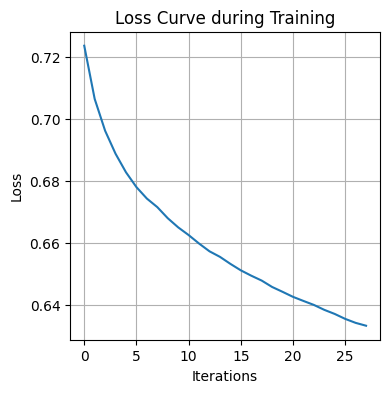

In [212]:
# Plot the loss curve
plt.figure(figsize = (4, 4))
plt.plot(clf.loss_curve_)
plt.title('Loss Curve during Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [213]:
# Conflusion matrix
cm = confusion_matrix(y1_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=['irony true', 'irony false'], columns=['Predicted irony true', 'Predicted irony false'])

# Display the confusion matrix
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
             Predicted irony true  Predicted irony false
irony true                    198                    109
irony false                   102                    164


In [214]:

# Calculate accuracies
train_accuracy = accuracy_score(y1_train, y_train_pred)
test_accuracy = accuracy_score(y1_test, y_test_pred)

# Calculate bias-variance difference
accuracy_difference = train_accuracy - test_accuracy

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Accuracy Difference (Bias-Variance Diagnostic): {accuracy_difference:.2f}")

# Diagnostic Interpretation
if accuracy_difference > 0.1:
    print("The model might suffer from high variance (overfitting).")
elif train_accuracy < 0.8:
    print("The model might suffer from high bias (underfitting).")
else:
    print("The model has a good balance between bias and variance.")

Training Accuracy: 0.63
Test Accuracy: 0.63
Accuracy Difference (Bias-Variance Diagnostic): 0.00
The model might suffer from high bias (underfitting).


#### 4.3.2 word embedding

In [359]:
# Large Neural Network with two hidden layers
clf = MLPClassifier(
    hidden_layer_sizes=(8, 3),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=2000,
    alpha=0.1,
    tol=1e-5,
    batch_size=64,
    random_state=1000,
    early_stopping=True
)
# Train the network
clf.fit(X2_train, y2_train)

# Predict on the training data
y_train_pred = clf.predict(X2_train)

# Predict on the test data
y_test_pred = clf.predict(X2_test)

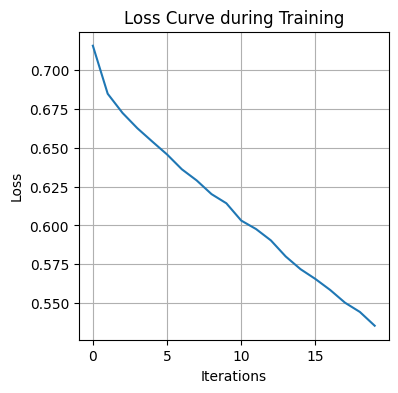

In [354]:
# Plot the loss curve
plt.figure(figsize = (4, 4))
plt.plot(clf.loss_curve_)
plt.title('Loss Curve during Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [355]:
# Conflusion matrix
cm = confusion_matrix(y2_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=['anger true', 'anger false'], columns=['Predicted anger true', 'Predicted anger false'])

# Display the confusion matrix
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
             Predicted anger true  Predicted anger false
anger true                    185                    122
anger false                   107                    159


In [360]:

# Calculate accuracies
train_accuracy = accuracy_score(y2_train, y_train_pred)
test_accuracy = accuracy_score(y2_test, y_test_pred)

# Calculate bias-variance difference
accuracy_difference = train_accuracy - test_accuracy

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Accuracy Difference (Bias-Variance Diagnostic): {accuracy_difference:.2f}")

# Diagnostic Interpretation
if accuracy_difference > 0.1:
    print("The model might suffer from high variance (overfitting).")
elif train_accuracy < 0.8:
    print("The model might suffer from high bias (underfitting).")
else:
    print("The model has a good balance between bias and variance.")

Training Accuracy: 0.70
Test Accuracy: 0.60
Accuracy Difference (Bias-Variance Diagnostic): 0.09
The model might suffer from high bias (underfitting).


#### 4.3.3 sentence embedding

In [428]:

clf = MLPClassifier(
    hidden_layer_sizes=(50, 23),       # Reduced complexity (fewer neurons and layers)
    activation='relu',
    solver='adam',
    learning_rate_init=0.0008,          # Lower learning rate for more stable learning
    max_iter=1000,
    alpha= 1,                         # Increased regularization to prevent overfitting
    tol=1e-4,                          # Standard tolerance
    batch_size=128,                    # Smaller batch size for more frequent updates
    random_state=1000,
    early_stopping=True,               # Enable Early Stopping
    validation_fraction=0.1,           # Use 10% of the data for validation
    verbose=True
)


# Train the network
clf.fit(X3_train, y3_train)

# Predict on the training data
y_train_pred = clf.predict(X3_train)

# Predict on the test data
y_test_pred = clf.predict(X3_test)

Iteration 1, loss = 1.23725927
Validation score: 0.637555
Iteration 2, loss = 1.06975899
Validation score: 0.646288
Iteration 3, loss = 0.97853243
Validation score: 0.681223
Iteration 4, loss = 0.90984288
Validation score: 0.694323
Iteration 5, loss = 0.84873599
Validation score: 0.703057
Iteration 6, loss = 0.79117118
Validation score: 0.689956
Iteration 7, loss = 0.74565430
Validation score: 0.698690
Iteration 8, loss = 0.70389298
Validation score: 0.703057
Iteration 9, loss = 0.66328796
Validation score: 0.668122
Iteration 10, loss = 0.61937020
Validation score: 0.663755
Iteration 11, loss = 0.57982321
Validation score: 0.676856
Iteration 12, loss = 0.54247694
Validation score: 0.672489
Iteration 13, loss = 0.51063826
Validation score: 0.659389
Iteration 14, loss = 0.48112635
Validation score: 0.637555
Iteration 15, loss = 0.46133941
Validation score: 0.655022
Iteration 16, loss = 0.43448390
Validation score: 0.633188
Validation score did not improve more than tol=0.000100 for 10 co

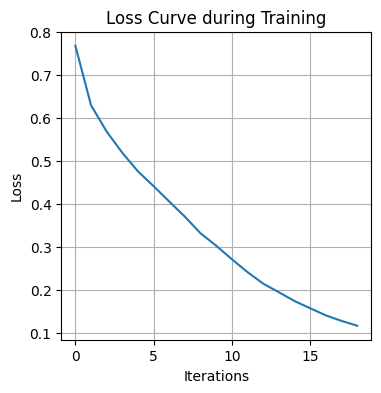

In [372]:
# Plot the loss curve
plt.figure(figsize = (4, 4))
plt.plot(clf.loss_curve_)
plt.title('Loss Curve during Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [373]:
# Conflusion matrix
cm = confusion_matrix(y3_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=['irony true', 'irony false'], columns=['Predicted irony true', 'Predicted irony false'])

# Display the confusion matrix
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
             Predicted irony true  Predicted irony false
irony true                    196                    111
irony false                    78                    188


In [429]:
# Calculate accuracies
train_accuracy = accuracy_score(y3_train, y_train_pred)
test_accuracy = accuracy_score(y3_test, y_test_pred)

# Calculate bias-variance difference
accuracy_difference = train_accuracy - test_accuracy

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Accuracy Difference (Bias-Variance Diagnostic): {accuracy_difference:.2f}")

# Diagnostic Interpretation
if accuracy_difference > 0.1:
    print("The model might suffer from high variance (overfitting).")
elif train_accuracy < 0.8:
    print("The model might suffer from high bias (underfitting).")
else:
    print("The model has a good balance between bias and variance.")

Training Accuracy: 0.85
Test Accuracy: 0.72
Accuracy Difference (Bias-Variance Diagnostic): 0.13
The model might suffer from high variance (overfitting).


## 5. Conclusion

In [431]:
# Data for the table
data = [
    ["4.1.1", "df_bag_of_word", "Logistic Regression", "0.58", "0.58", "Bias"],
    ["4.1.2", "df_word_embedding", "Logistic Regression", "0.71", "0.61", "Variance and bias"],
    ["4.1.3", "df_sentence_embedding", "Logistic Regression", "0.86", "0.59", "Variance"],
    ["4.2.1", "df_bag_of_word", "Small Neural Network", "0.60", "0.53", "Variance and bias"],
    ["4.2.2", "df_word_embedding", "Small Neural Network", "0.81", "0.63", "Variance"],
    ["4.2.3", "df_sentence_embedding", "Small Neural Network", "0.98", "0.60", "Variance"],
    ["4.3.1", "df_bag_of_word", "Large Neural Network", "0.63", "0.63", "Bias"],
    ["4.3.2", "df_word_embedding", "Large Neural Network", "0.70", "0.60", "Variance and bias"],
    ["4.3.3", "df_sentence_embedding", "Large Neural Network", "0.85", "0.72", "Variance"],
]

# Create a DataFrame
columns = ["Test ID", "DataFrame", "Model", "Training Accuracy", "Test Accuracy", "Problem"]
df = pd.DataFrame(data, columns=columns)

# Set column display width to avoid overlap in Jupyter/Terminal
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
display(df)



,Test ID,DataFrame,Model,Training Accuracy,Test Accuracy,Problem
0,4.1.1,df_bag_of_word,Logistic Regression,0.58,0.58,Bias
1,4.1.2,df_word_embedding,Logistic Regression,0.71,0.61,Variance and bias
2,4.1.3,df_sentence_embedding,Logistic Regression,0.86,0.59,Variance
3,4.2.1,df_bag_of_word,Small Neural Network,0.60,0.53,Variance and bias
4,4.2.2,df_word_embedding,Small Neural Network,0.81,0.63,Variance
5,4.2.3,df_sentence_embedding,Small Neural Network,0.98,0.60,Variance
6,4.3.1,df_bag_of_word,Large Neural Network,0.63,0.63,Bias
7,4.3.2,df_word_embedding,Large Neural Network,0.70,0.60,Variance and bias
8,4.3.3,df_sentence_embedding,Large Neural Network,0.85,0.72,Variance


In conclusion, we can say that our models are not very effective.
The models 4.3.1 and 4.3.3 are likely the most efficient by default, but they suffer respectively from issues of bias and variance, making them difficult to use.
This could be due to several reasons: a lack of data, poor implementation of the models (particularly neural network models), or the fact that the variable of irony is genuinely difficult for machines to predict. It may require far more complex models than the ones used here, as the article clearly explains.
These are areas that could be refined for future studies.
